In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pytorch_tabnet.tab_model import TabNetClassifier

In [4]:
# Load datasets
red = pd.read_csv("../data/wine+quality/winequality-red.csv", sep=';')
white = pd.read_csv("../data/wine+quality/winequality-white.csv", sep=';')

# Add 'type' feature
red['type'] = 'red'
white['type'] = 'white'

# Combine datasets
df = pd.concat([red, white], ignore_index=True)

# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize TabNet classifier
clf = TabNetClassifier()

# Train the model
clf.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/opt/anaconda3/envs/sago/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.63005 | test_accuracy: 0.44    |  0:00:00s
epoch 1  | loss: 1.25613 | test_accuracy: 0.46538 |  0:00:00s
epoch 2  | loss: 1.19044 | test_accuracy: 0.49462 |  0:00:00s
epoch 3  | loss: 1.16546 | test_accuracy: 0.50154 |  0:00:00s
epoch 4  | loss: 1.12604 | test_accuracy: 0.51615 |  0:00:00s
epoch 5  | loss: 1.0996  | test_accuracy: 0.50308 |  0:00:00s
epoch 6  | loss: 1.08962 | test_accuracy: 0.51462 |  0:00:01s
epoch 7  | loss: 1.08032 | test_accuracy: 0.53077 |  0:00:01s
epoch 8  | loss: 1.06742 | test_accuracy: 0.53077 |  0:00:01s
epoch 9  | loss: 1.07354 | test_accuracy: 0.53385 |  0:00:01s
epoch 10 | loss: 1.0585  | test_accuracy: 0.53769 |  0:00:01s
epoch 11 | loss: 1.0562  | test_accuracy: 0.54    |  0:00:01s
epoch 12 | loss: 1.05443 | test_accuracy: 0.52923 |  0:00:02s
epoch 13 | loss: 1.0607  | test_accuracy: 0.52846 |  0:00:02s
epoch 14 | loss: 1.04471 | test_accuracy: 0.54462 |  0:00:02s
epoch 15 | loss: 1.0455  | test_accuracy: 0.53308 |  0:00:02s
epoch 16

/opt/anaconda3/envs/sago/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.5646
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.63      0.63      0.63       428
           6       0.56      0.64      0.60       567
           7       0.45      0.47      0.46       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1300
   macro avg       0.24      0.25      0.24      1300
weighted avg       0.53      0.56      0.55      1300



/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/sago/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


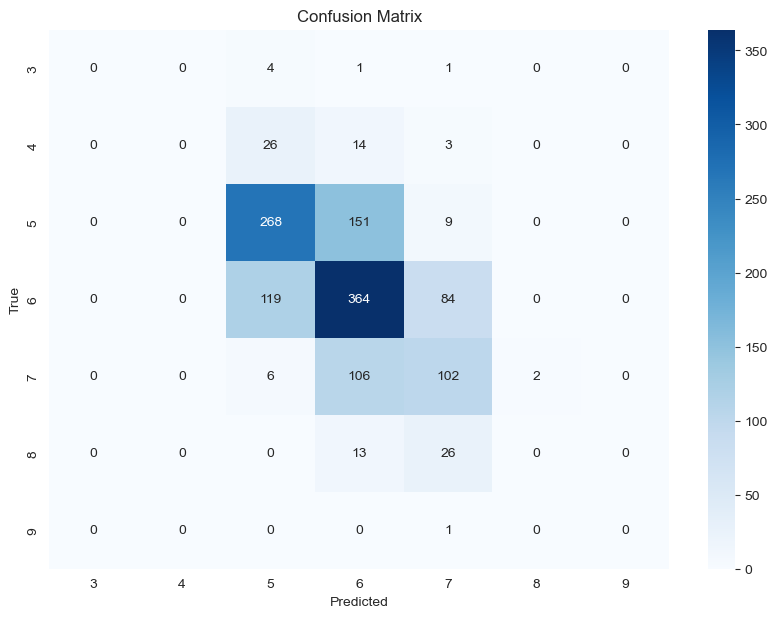

In [6]:
# Predictions
preds = clf.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, preds, target_names=le.classes_.astype(str)))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

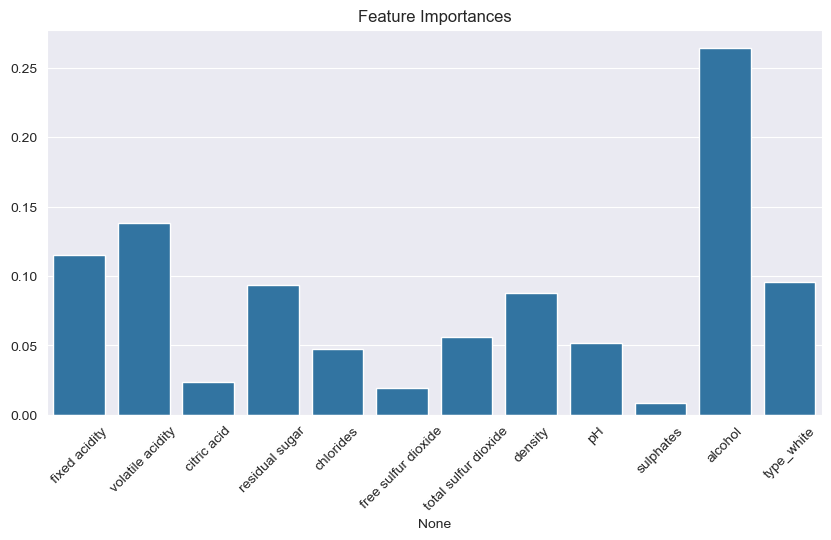

In [7]:
# Feature importance
feature_importances = clf.feature_importances_

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=X.columns, y=feature_importances)
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()